In [55]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile
import io


In [56]:

def read_zip(zip_fn,extract_fn=None):
    zf=ZipFile(zip_fn)
    if extract_fn:
        return zf.read(extract_fn)
    else:
        return{name:zf.read(name) for name in zf.namelist()}

In [57]:
df=pd.read_csv(io.BytesIO(read_zip(r"C:\Users\Rajesh\Downloads\avocado.csv (1).zip","avocado.csv")))


In [58]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [60]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [61]:
df.shape


(18249, 13)

In [62]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [63]:
df['Date']=pd.to_datetime(df['Date'])

In [64]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [65]:

df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5, 1.0, 'Average Price')

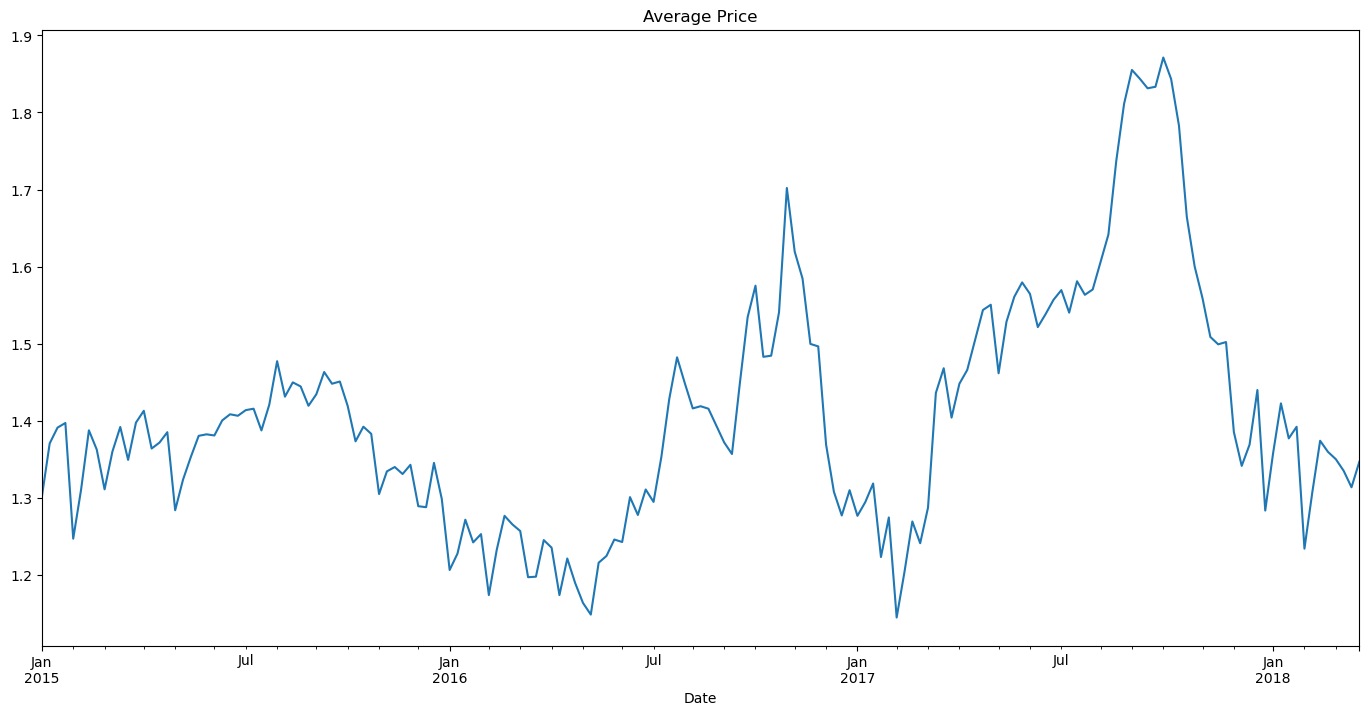

In [66]:
import matplotlib.pyplot as plt


byDate=df.groupby('Date').mean()
plt.figure(figsize=(17,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')




Text(0.5, 1.0, 'Average Price Per Month')

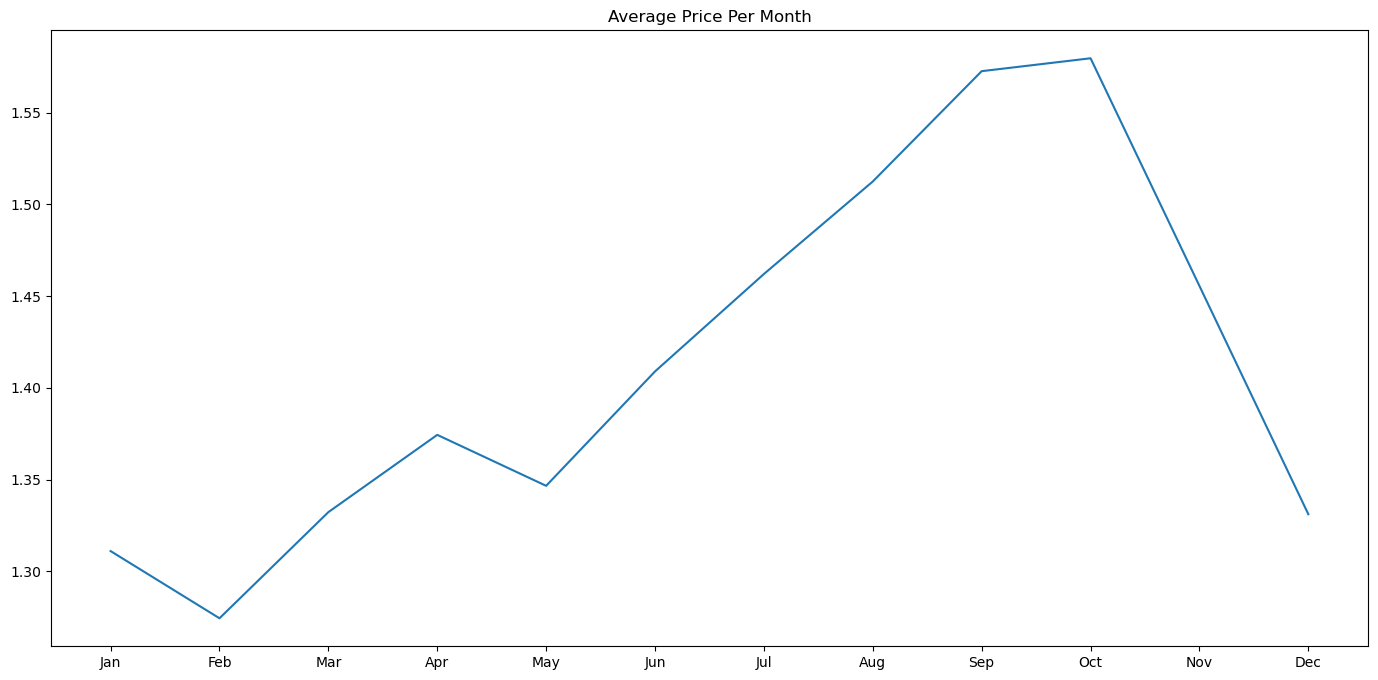

In [67]:
byMonth=df.groupby('Month').mean()
plt.figure(figsize=(17,8))
plt.plot(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],byMonth['AveragePrice'])
plt.title('Average Price Per Month')

Text(0.5, 1.0, 'Average Priceper Day')

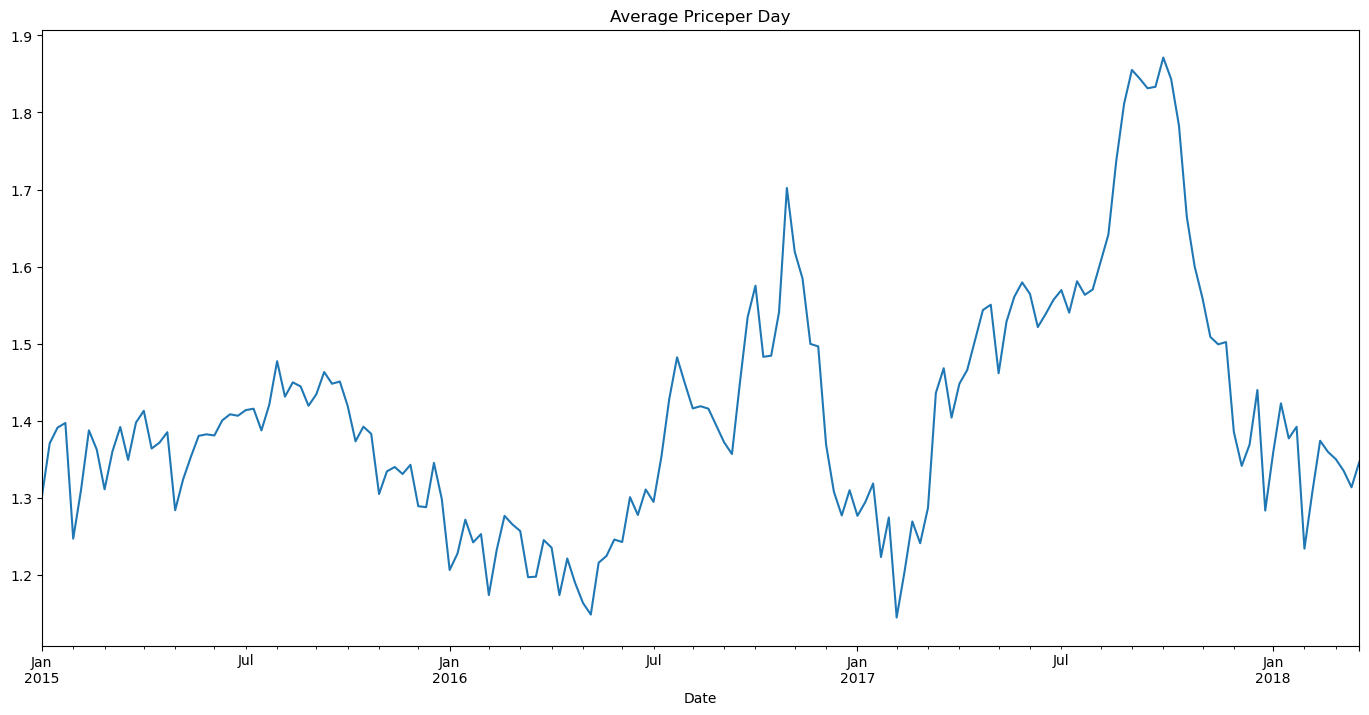

In [68]:
byDay=df.groupby('Day').mean()
plt.figure(figsize=(17,8))
byDate['AveragePrice'].plot()
plt.title('Average Priceper Day')

Text(0.5, 1.0, 'Average Price according to Regon')

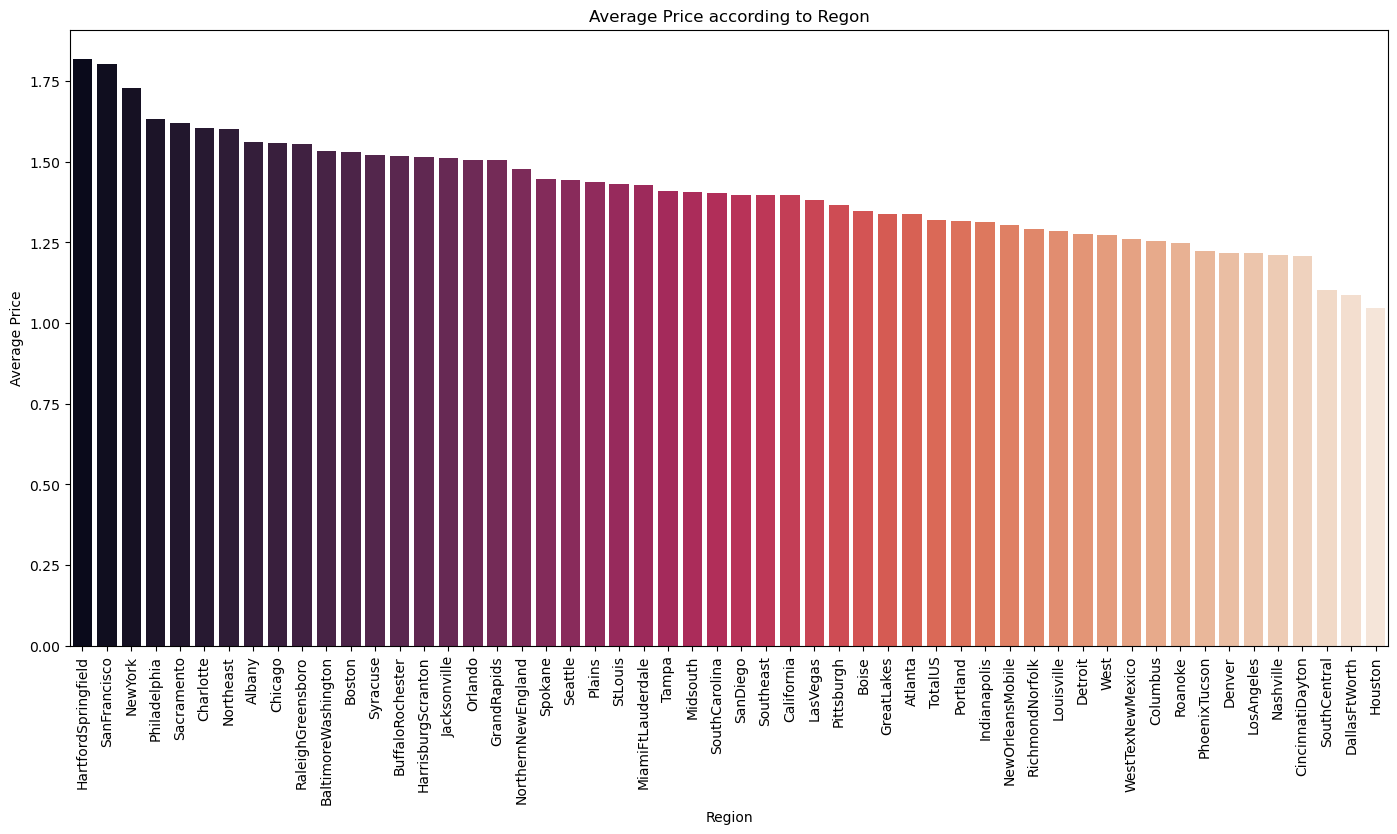

In [69]:
import seaborn as sns

byRegion=df.groupby('region').mean()
byRegion.sort_values(by=['AveragePrice'],ascending=False, inplace=True)
plt.figure(figsize=(17,8))
sns.barplot(x=byRegion.index, y=byRegion['AveragePrice'],data=byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price according to Regon')

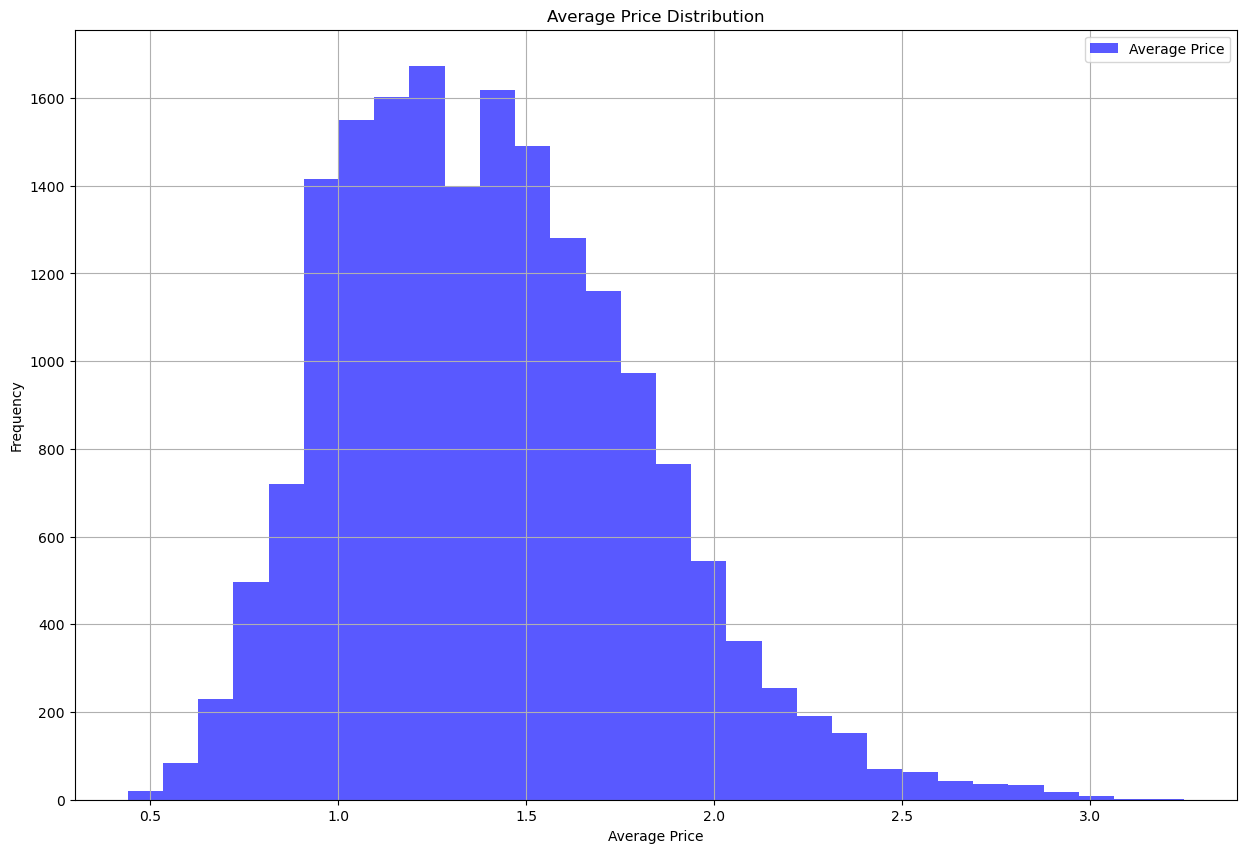

In [70]:
plt.figure(figsize=(15,10))
df['AveragePrice'].plot(kind='hist',color='b',bins=30,grid=True,alpha=0.65,label='Average Price')
plt.legend()
plt.xlabel('Average Price')
plt.title('Average Price Distribution')
plt.show()

<Axes: >

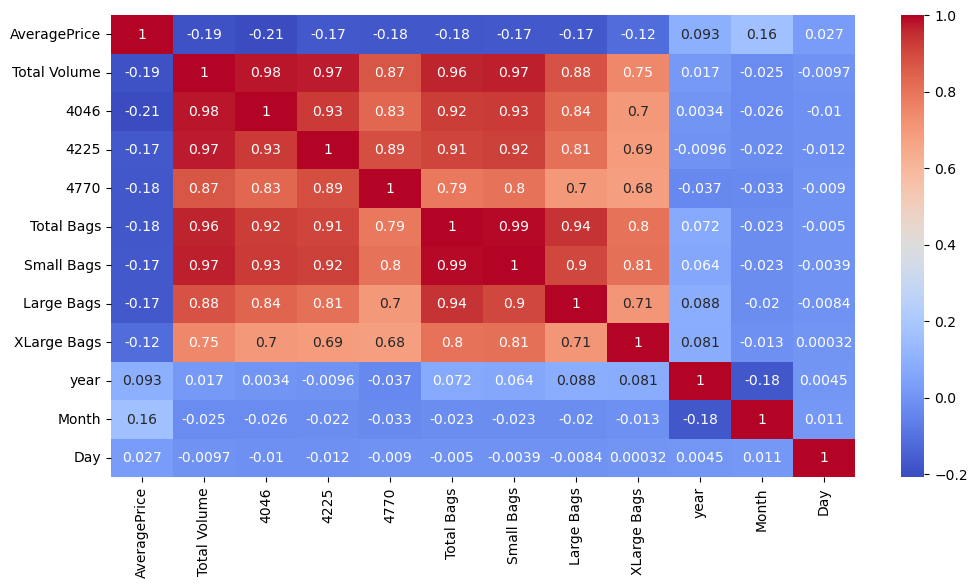

In [71]:
import numpy as np
corr_df=df.corr(method='pearson')
plt.figure(figsize=(12,6))
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

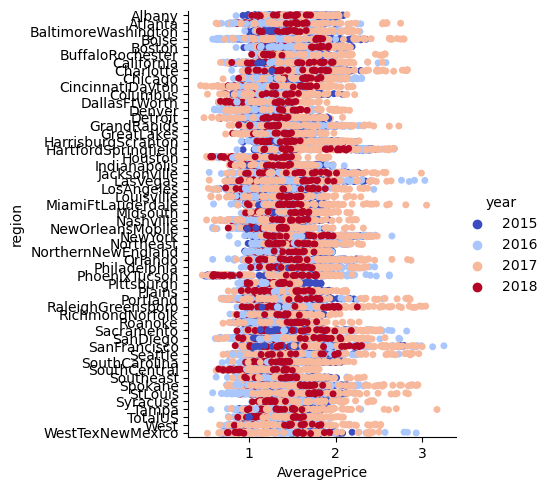

In [72]:

sns.catplot(data=df,x='AveragePrice',y='region',hue='year',palette='coolwarm')
plt.show()

In [73]:
df_vif=df.copy()
df_vif.drop(columns=['Date','type','region'],inplace=True)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
Xf=add_constant(df_vif)
pd.Series([variance_inflation_factor(Xf.values,i) for i in range(Xf.shape[1])],index=Xf.columns)

const           5.068485e+06
AveragePrice    1.099766e+00
Total Volume    4.918067e+09
4046            6.598339e+08
4225            5.978631e+08
4770            4.762133e+06
Total Bags      2.370316e+14
Small Bags      1.364727e+14
Large Bags      1.448103e+13
XLarge Bags     7.622174e+10
year            1.101665e+00
Month           1.071816e+00
Day             1.001467e+00
dtype: float64

<Axes: >

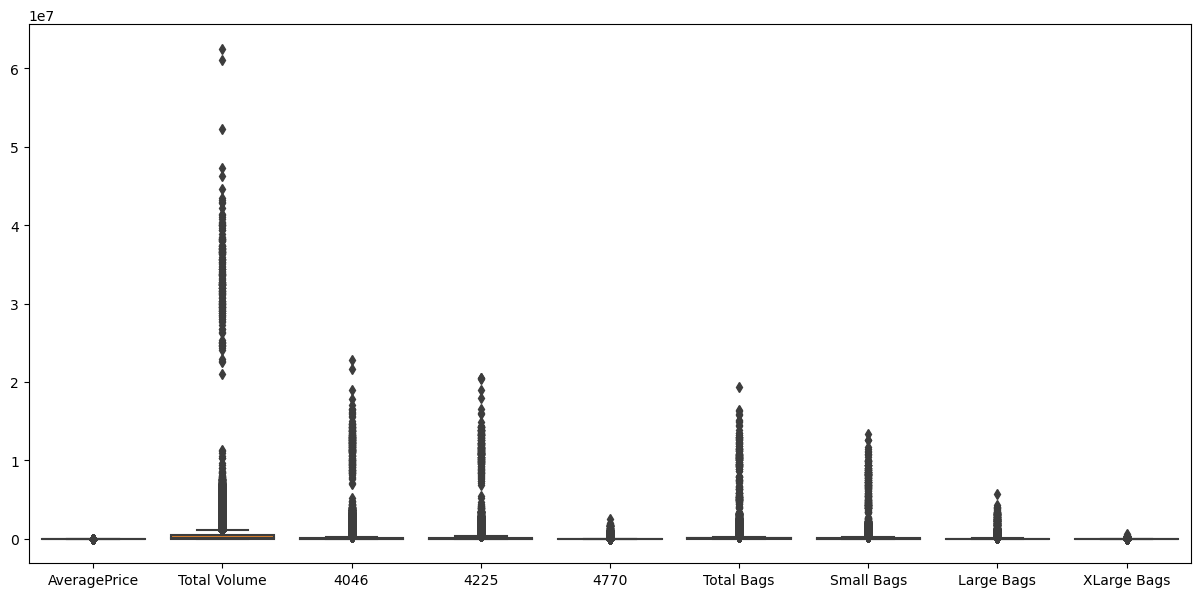

In [74]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

In [75]:
df.drop(columns=['Date'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [76]:
import numpy as np
from numpy import percentile
columns=df.columns
for j in columns:
    if isinstance(df[j][0],str):
        continue
    else:
        quartiles=percentile(df[j],[25,75])
        lower_fen=quartiles[0]-(1.5*(quartiles[1]-quartiles[0]))
        upper_fen=quartiles[1]+(1.5*(quartiles[1]-quartiles[0]))
        df[j]=df[j].apply(lambda x:upper_fen if x > upper_fen else (lower_fen if x < lower_fen else x))

In [77]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<Axes: >

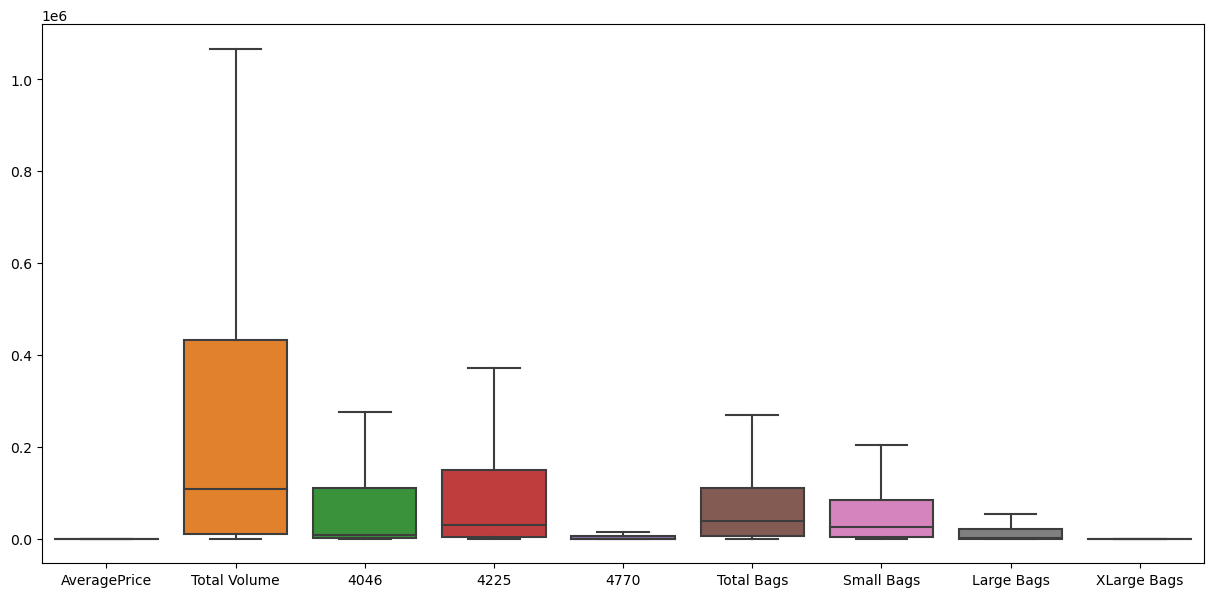

In [78]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])

In [79]:
df['region']=pd.Categorical(df['region'])
dfDummies_region=pd.get_dummies(df['region'],prefix='region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
df=pd.concat([df,dfDummies_region],axis=1)
df.drop(columns='region',inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,1


In [81]:
df['Month']=pd.Categorical(df['Month'])
dfDummies_month=pd.get_dummies(df['Month'],prefix='month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


In [82]:
df=pd.concat([df,dfDummies_month],axis=1)
df.drop(columns='Month',inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['type']=label_encoder.fit_transform(df['type'])
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
X=df.iloc[:,1:78]
y=df['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
y_test=np.array(y_test,dtype=float)

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [92]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true,y_pred)
    mse=metrics.mean_squared_error(y_true,y_pred)
    r2=metrics.r2_score(y_true,y_pred)
    adjusted_r2=1-(1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)
    print('Explained Variance :',round(explained_variance,4))
    print('R2',round(r2,4))
    print('Adjusted_r2',round(adjusted_r2,4))
    print('MAE',round(mean_absolute_error,4))
    print('MSE',round(mse,4))
    print('RMSE',round(np.sqrt(mse),4))

In [93]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
    print('Accuracy:{:.2f}%'.format(accuracies.mean()*100))
    print('Standard Deviation: {:.2f}%'.format(accuracies.std()*100))

In [97]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

rg=LinearRegression()

rg.fit(X_train,y_train)
y_pred=rg.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(rg)

Explained Variance : 0.6665
R2 0.6664
Adjusted_r2 0.6592
MAE 0.1779
MSE 0.0541
RMSE 0.2327
Accuracy:64.15%
Standard Deviation: 1.48%


In [100]:
pip install -U yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ------------ -------------------------- 92.2/282.6 kB 5.1 MB/s eta 0:00:01
     --------------------------------- ---- 245.8/282.6 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


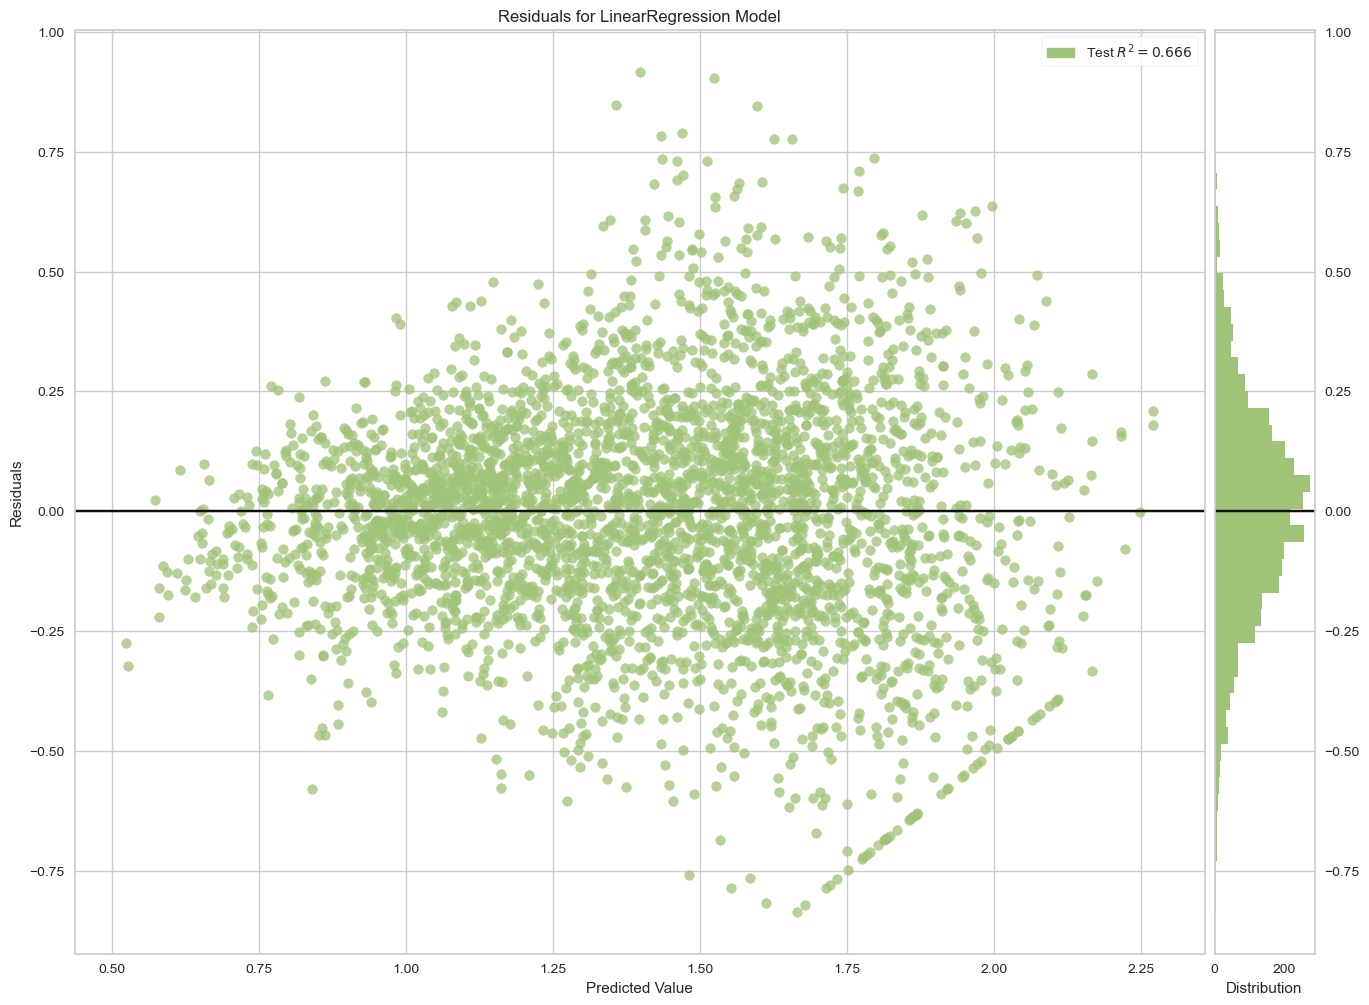

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [105]:
from yellowbrick.regressor import ResidualsPlot
fig=plt.figure(figsize=(16,12))
visualizer=ResidualsPlot(rg, hist=True, qqplot=False)
visualizer.score(X_test,y_test)
visualizer.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_regressor=RandomForestRegressor()
rand_regressor.fit(X_train,y_train)
y_pred_rf=rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained Variance : 0.905
R2 0.905
Adjusted_r2 0.9029
MAE 0.0893
MSE 0.0154
RMSE 0.1242


In [ ]:
fig=plt.figure(figsize=(16,12))
visualizer=ResidualsPlot(rand_regressor,hist=True,qqplot=False)
visualizer.score(X_test,y_test)
visualizer.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree=DecisionTreeRegressor(criterion=mse,splitter='random',randm_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt=decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

In [ ]:
fig=plt.figure(figsize=(16,12))
visualizer=ResidualsPlot(decision_tree,hist=True,qqplot=False)
visualizer.score(X_test,y_test)
visualizer.show()

In [49]:
#conclusion is that random forest model is best suited for predicting avocado price